
    
##### Problem statement - identify a particular website and extract info using beautiful soup or scrapy and store information in a (csv/xml/json)file and use data preprocessing techniques using numpy and pandas , next use data wrangling techniques for missing values, outliers etc, apply visualisation techniques and plot graph for the dataset




### Scraping Laptop Data from Flipkart Website using Beautiful Soup

In [36]:
# importing libraries
from bs4 import BeautifulSoup
import requests
from fake_useragent import UserAgent
import pandas as pd
import numpy as np

In [41]:
# opening our output file in append mode
File = open("flipkart.csv", "a")

In [5]:
# specifying user agent
ua = UserAgent()
header = {'user-agent':ua.chrome}

In [ ]:
URL = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
# Making the HTTP Request
webpage = requests.get(URL, headers=header)

# Creating the Soup Object containing all data
soup = BeautifulSoup(webpage.content, "lxml")
print(soup.prettify()) #this function will make the html tags easier to analyze

In [ ]:
#getting the laptop names in the title 

for title in soup.find_all('div', class_ = "_4rR01T"):
    title = title.string #extracting the text part of the title
    print(title)
    File.write(f"{title},")
    

In [9]:
#getting the prices for laptop
for prices in soup.find_all('div',class_ ="_30jeq3 _1_WHN1"):
    prices = prices.text.strip()[1:].replace(',','')
    File.write((f"{prices},"))

In [11]:
#ratings out of 5 for each laptop
for ratings in soup.find_all('div',class_='_3LWZlK'):
    ratings = float(ratings.text) #converting into float type before appending
    #print(ratings) 
    File.write((f"{ratings},"))

In [ ]:
# No of ratings
for reviews in soup.find_all('span',class_="_2_R_DZ"):
    reviews = reviews.text
    print(reviews)
    #File.write((f"{reviews},"))

In [25]:
#Discount percentage
print(soup.find('div',class_="_3Ay6Sb").text.split()[0].strip()[0:2])

46


#### Creating a Generalized Function to scrape: Title , Prices, Ratings,Discount

In [43]:
# Creating an Function to take multiple URLS and extract data from each page
def flipkart_scrape(URL):
    # specifying user agent
    ua = UserAgent()
    header = {'user-agent':ua.chrome}
    # Making the HTTP Request
    webpage = requests.get(URL, headers=header)

    # Creating the Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "lxml")
    #print(soup.prettify()) #this function will make the html tags easier to analyze

    #getting the laptop names in the title 

    for title in soup.find_all('div', class_ = "_4rR01T"):
        title = title.string #extracting the text part of the title
        File.write(f"{title},")

    #getting the prices for laptop
    for prices in soup.find_all('div',class_ ="_30jeq3 _1_WHN1"):
        prices = prices.text.strip()[1:].replace(',','')
        File.write((f"{prices},"))

    #ratings out of 5 for each laptop
    for ratings in soup.find_all('div',class_='_3LWZlK'):
        ratings = float(ratings.text) #converting into float type before appending
        #print(ratings) 
        File.write((f"{ratings},"))

    #Discount percentage
    for discount in soup.find_all('div',class_="_3Ay6Sb"):
        try:
            discount = float(discount.text.split()[0].strip()[0:2])
        except:
            discount = np.nan    
        File.write((f"{discount},"))





Collecting URLS to pass onto function

In [26]:
URL1 = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
URL2 = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2'
URL3 = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3'

Calling the function with the collected URLS

In [44]:
#URL 1
flipkart_scrape(URL1)

In [45]:
#URL2
flipkart_scrape(URL2)

In [46]:
#URL3
flipkart_scrape(URL3)

In [47]:
#Closing the csv file
File.close()

In [48]:
#Reading the file into pandas dataframe to perform visualizations
df = pd.read_csv('flipkart.csv')
df.head()

,Title,price,ratings,discount
0,HP Pavilion Ryzen 5 Hexa Core - (16 GB/512 GB ...,59999.0,4.2,19.0
1,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,39990.0,4.3,21.0
2,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,44990.0,4.7,21.0
3,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,39490.0,4.2,35.0
4,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,52990.0,4.4,41.0


#### Data processing 

In [62]:
#checking for any null values if any
print(df.isnull().values.any())

#checking the number of nan values in each of the columns
df.isnull().sum()



True


Title       0
price       2
ratings     2
discount    2
dtype: int64

In [67]:
#Using the drop na method to drop the na values
df = df.dropna(axis=0,how='any')

In [68]:
#checking for na values again
df.isnull().sum()

Title       0
price       0
ratings     0
discount    0
dtype: int64

In [72]:
#converting each column in dataframe to numeric values
df['price'] = pd.to_numeric(df['price'])
df['ratings'] = pd.to_numeric(df['ratings'])
df['discount'] = pd.to_numeric(df['discount'])


In [74]:
df

,Title,price,ratings,discount
0,HP Pavilion Ryzen 5 Hexa Core - (16 GB/512 GB ...,59999.0,4.2,19.0
1,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,39990.0,4.3,21.0
2,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,44990.0,4.7,21.0
3,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,39490.0,4.2,35.0
4,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,52990.0,4.4,41.0
...,...,...,...,...
67,MSI Bravo Ryzen 5 Hexa Core 5600H - (8 GB/512 ...,59990.0,4.3,17.0
68,MSI GF63 Thin Core i7 10th Gen - (16 GB/512 GB...,78190.0,4.0,31.0
69,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,39990.0,4.7,28.0
70,HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...,67990.0,4.0,18.0


Visualizing the data

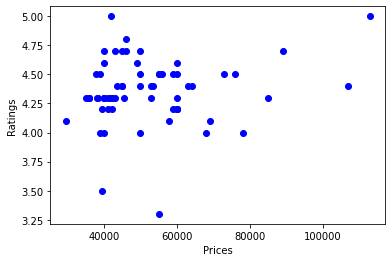

We can visualize from the following graph that prices range around 
 40 - 60 k has more laptops with good ratings 
 and it makes our decision easy to choose budget and laptop


In [84]:
#importing the lib
import matplotlib.pyplot as plt

#plotting the data

plt.scatter(df['price'],df['ratings'],c='blue')
plt.xlabel('Prices')
plt.ylabel('Ratings')
plt.show()
print("We can visualize from the following graph that prices range around \n 40 - 60 k has more laptops with good ratings \n and it makes our decision easy to choose budget and laptop") 